This is code for running simple FED3 analyses using the [FED3](https://earnestt1234.github.io/fed3/fed3/index.html) library written by Tom Earnest.

It will import a folder of FED3 files, crop them by time, group them, and make plots for total pellets, pokes, accuracy, etc.

NOTE: the FED3 library will need to be installed (Step 0)

## Step 0: Install FED3 library

In [2]:
!pip install git+https://github.com/earnestt1234/fed3.git -q fed3

  Preparing metadata (setup.py) ... done


In [5]:
#%% import libraries and set plot parameters
import fed3
import fed3.plot as fplot
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
from google.colab import files
import warnings
warnings.filterwarnings('ignore')  # this is a bit dangerous but we'll supress warnings

plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

## Step 1: Import data

Saving FED001_010725_03.CSV to FED001_010725_03 (1).CSV
Saving FED002_010725_concat.csv to FED002_010725_concat (1).csv
Saving FED003_010725_03.CSV to FED003_010725_03 (1).CSV
Saving FED004_010725_02.CSV to FED004_010725_02 (1).CSV
Saving FED005_010725_04.CSV to FED005_010725_04 (1).CSV
Saving FED006_010725_03.CSV to FED006_010725_03 (1).CSV
Loaded 6 files: ['FED001_010725_03 (1).CSV', 'FED002_010725_concat (1).csv', 'FED003_010725_03 (1).CSV', 'FED004_010725_02 (1).CSV', 'FED005_010725_04 (1).CSV', 'FED006_010725_03 (1).CSV']


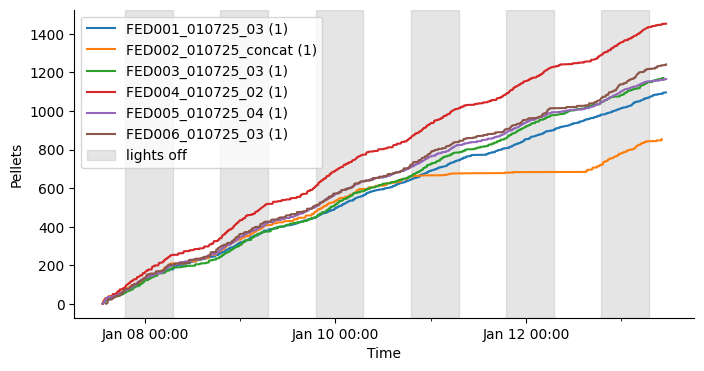

In [6]:
# Upload multiple files
uploaded = files.upload()

# List of loaded FED3 files, only including files > 1KB
feds = [fed3.load(file) for file, data in uploaded.items() if len(data) > 1024]

# Proceed if any files were loaded
if feds:
    fed3.as_aligned(feds, alignment="datetime", inplace=True)

    # Print loaded file names
    loaded_files = [file for file, data in uploaded.items() if len(data) > 1024]
    print(f"Loaded {len(feds)} files: {loaded_files}")

    # Plot raw data
    plt.figure(figsize=(8, 4))
    fplot.line(feds, y='pellets')
    plt.show()
else:
    print("No valid files loaded.")

## Step 2: Crop files to a defined time period (optional)

FEDFrame 0: Duration = 2 days 23:41:07
FEDFrame 1: Duration = 2 days 22:30:44
FEDFrame 2: Duration = 2 days 23:31:08
FEDFrame 3: Duration = 2 days 23:36:08
FEDFrame 4: Duration = 2 days 23:42:10
FEDFrame 5: Duration = 2 days 23:00:14


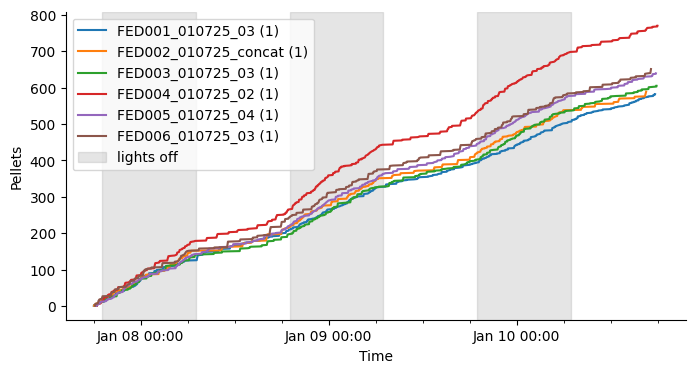

In [7]:
# Define start and end times
start_time = "2025-01-07 18:00:00"
end_time = "2025-01-10 18:00:00"

# Apply timecrop to each FEDFrame in feds
feds_cropped = [fed3.timecrop(fed, start=start_time, end=end_time) for fed in feds]

# Print the duration of each cropped FEDFrame (Check that this appears accurate!)
for i, fed in enumerate(feds_cropped):
    print(f"FEDFrame {i}: Duration = {fed.duration}")

plt.figure(figsize=(8, 4))
fplot.line(feds_cropped, y='pellets')
plt.show()

## Step 3: Group data (optional)

In [8]:
grouped = {
    'Wildtype': [feds_cropped[i] for i in [0, 2, 5]],
    'Transgenic': [feds_cropped[i] for i in [1, 3, 4]]
}

## Step 4: Make plots

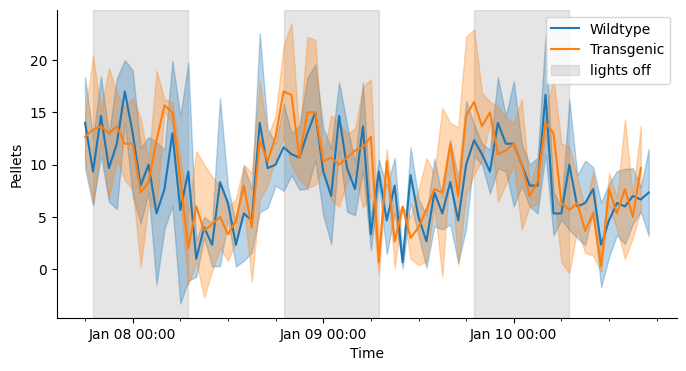

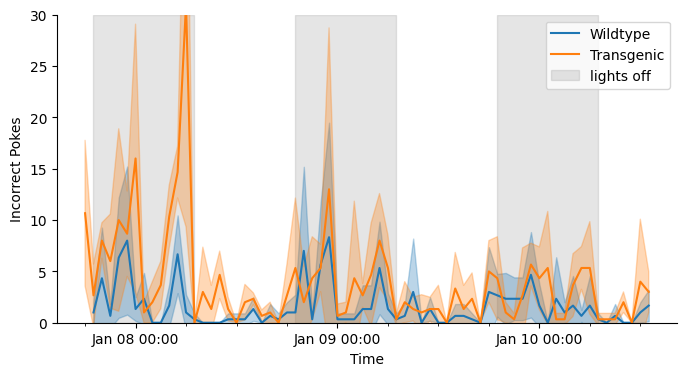

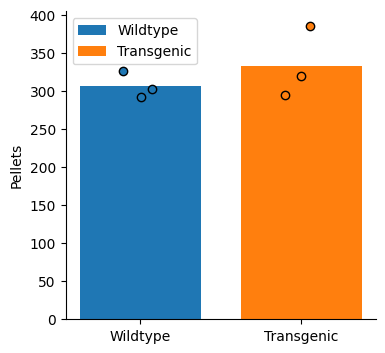

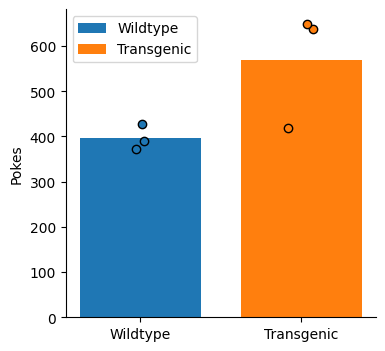

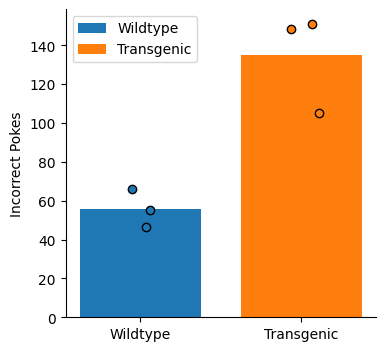

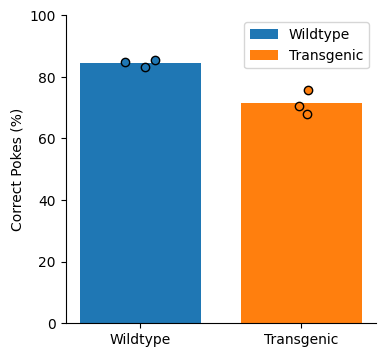

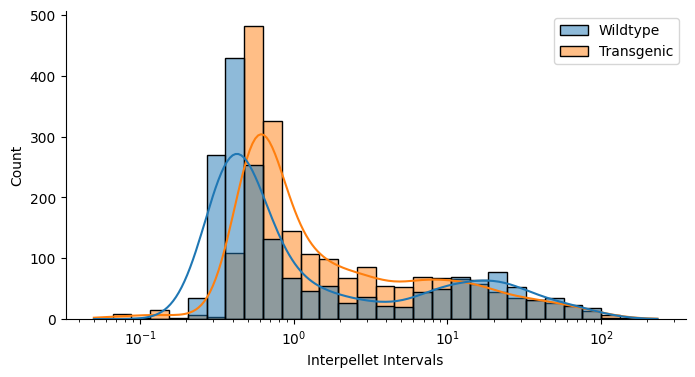

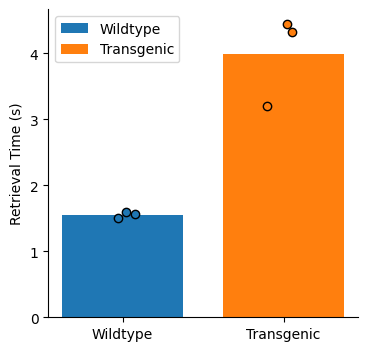

In [12]:
#%% compare line plots
plt.figure(figsize=(8, 4))
fplot.line(grouped, y='pellets', bins='1H')
plt.show()
print () #skip line

#%% compare line plots
plt.figure(figsize=(8, 4))
fplot.line(grouped, y='binary_error_pokes', bins='1H')
plt.ylim(0,30)
plt.show()
print ()

#%% Compare total pellets
fig = fplot.bar(grouped, y='pellets', stat='mean', var=None, show_individual=True)
plt.show()
print ()

#%% Compare left pokes
fig = fplot.bar(grouped, y='pokes', stat='mean', var=None, show_individual=True)
plt.show()
print ()

#%% Compare error pokes
data = fplot.bar(grouped, y='cumulative_error_pokes', stat='mean', var=None, show_individual=True, output = "data")
plt.show()
print ()

#%% Compare accuracy
fig = fplot.bar(grouped, y='cumulative_correct_percent', stat='mean', var=None, show_individual=True)
plt.ylim(0,100)
plt.show()
print ()

#%%
plt.figure(figsize=(8, 4))
fplot.ipi(grouped, logx=True, kde=True, mixed_align='raise', output='plot', ax=None, legend=None)
plt.show()
print ()

#%% Compare retrieval time
fig = fplot.bar(grouped, y='rt', stat='mean', var=None, show_individual=True)
plt.show()

## Combined .py file for running offline

In [ ]:
#%% import libraries
import fed3
import fed3.plot as fplot
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot parameters
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

#%% import data
# Define directory
directory = r'C:\Users\basugargic\Box\Kravitz Lab Box Drive\Gargi\Cashikar_2025\FR1_Round'

# List all CSV files in the directory (case-insensitive)
files = [f for f in os.listdir(directory) if f.lower().endswith('.csv')]

# Load all files and store them in a list
feds = [fed3.load(os.path.join(directory, file)) for file in files]

# align FEDs
fed3.as_aligned (feds, alignment = "datetime", inplace=True)

# Print loaded file names (optional)
print(f"Loaded {len(feds)} files:", files)

#%%  Plot raw data
plt.figure(figsize=(8, 4))
fplot.line(feds, y='pellets')
plt.show()

#%% Slice all files to last 72 hours and print a summary plot

# Define start and end times
start_time = "2025-01-07 18:00:00"
end_time = "2025-01-10 18:00:00"

# Apply timecrop to each FEDFrame in feds
feds_cropped = [fed3.timecrop(fed, start=start_time, end=end_time) for fed in feds]

# Print the duration of each cropped FEDFrame (Check that this appears accurate!)
for i, fed in enumerate(feds_cropped):
    print(f"FEDFrame {i}: Duration = {fed.duration}")

plt.figure(figsize=(8, 4))
fplot.line(feds_cropped, y='pellets')

#%%  Group data
grouped = {
    'Wildtype': [feds_cropped[i] for i in [0, 2, 5]],
    'Transgenic': [feds_cropped[i] for i in [1, 3, 4]]
}

#%% compare line plots
plt.figure(figsize=(8, 4))
fplot.line(grouped, y='pellets', bins='1H')

#%% compare line plots
plt.figure(figsize=(8, 4))
fplot.line(grouped, y='pokes', bins='1H')

#%% Compare total pellets
fig = fplot.bar(grouped, y='pellets', stat='mean', var=None, show_individual=True)

#%% Compare left pokes
fig = fplot.bar(grouped, y='pokes', stat='mean', var=None, show_individual=True)

#%% Compare error pokes
fig = fplot.bar(grouped, y='cumulative_error_pokes', stat='mean', var=None, show_individual=True)

#%% Compare accuracy
fig = fplot.bar(grouped, y='cumulative_correct_percent', stat='mean', var=None, show_individual=True)
plt.ylim(0,100)

#%%
fplot.ipi(grouped, logx=True, kde=True, mixed_align='raise', output='plot', ax=None, legend=None)

#%% Compare retrieval time
fig = fplot.bar(grouped, y='rt', stat='mean', var=None, show_individual=True)
